<img width="180" height="300" align ="left" src="img/iteso.jpg">

<body>
<head>
<div align="right">
<h4><b>Proyecto #4: Marvel</b></h4>
</div>
</head>
<div align="right">
<br><br><br>         
<h5>César Villarreal Hernández, ie707560</h5>              
</div>
<div align="right">
<h5>Aprendizaje Máquina</h5>   
</div>
<div align="right">
<h5>Lunes 12 de Julio de 2021</h5>  
</div>
</body>

#### **I. Introducción**
---

El objetivo de este proyecto es el clasificar imágenes del dataset de Marvel, de manera que se implementan diferentes clasificadores y se entrenan estos con las imagenes del conjunto de datos. El documento comienza introduciendo al lector a conceptos clave para el entendimiento de la práctica. Posteriormente, se realiza un análisis de los datos a procesar, y se identifica la manera más óptima de abordar el problema. Después se entrena los modelos de clasificación con la información ajustada, y se obtienen los resultados. El documento concluye con el análisis y reflexión de los resultados obtenidos.

#### **II. Marco Teórico**
--- 

<h5><b>Clasificación</b></h5>

"Las tareas basadas en clasificación son un subcampo del aprendizaje máquina supervisado, donde la clave es predeccir las etiquetas de salida o respuestas que son categoricas por naturaleza, para un dato de entrada basado en lo que el modelo ha aprendido durante la fase de entrenamiento" (Dipanjan Sarkar, Raghav Bali, & Tushar Sharma, 2018).


<h5><b>Random Forest</b></h5>

"Un Random Forest es un conjunto (ensemble) de árboles de decisión combinados con bagging. Al usar bagging, lo que en realidad está pasando, es que distintos árboles ven distintas porciones de los datos. Ningún árbol ve todos los datos de entrenamiento. Esto hace que cada árbol se entrene con distintas muestras de datos para un mismo problema. De esta forma, al combinar sus resultados, unos errores se compensan con otros y tenemos una predicción que generaliza mejor" (Martínez J., 2020).

<img width="180" height="300" align ="left" src="img/rf.jpg">


<h5><b>SVM</b></h5>

"Las Máquinas de Vectores de Soporte (Support Vector Machines) permiten encontrar la forma óptima de clasificar entre varias clases. La clasificación óptima se realiza maximizando el margen de separación entre las clases. Los vectores que definen el borde de esta separación son los vectores de soporte." (Martínez J., 2020).


<img width="180" height="300" align ="left" src="img/unnamed.png">

latidos
<h5><b>Redes neuronales</b></h5>

"Una red neuronal es un modelo simplificado que emula el modo en que el cerebro humano procesa la información: Funciona simultaneando un número elevado de unidades de procesamiento interconectadas que parecen versiones abstractas de neuronas" (IBM, 2021).

<img width="180" height="300" align ="left" src="img/nn.jpg">

#### **III. Desarollo Teórico**
---



Para construir el dataset se utilizó el software Orange3, utilizando el plug-in de Image Embedding. Se descargaron las imágenes de Kaggle, la cual contiene imágenes de supehérores de marvel separadas en diferentes carpetas con identificadores diferentes. Image embedding permite otorgarle una categoría a la imágen de acuerdo a la subcarpeta en la que se encuentra la imágen. Se obtuvieron dos archivos .csv conteniendo los datos para entrenamiento y prueba.


In [1]:
import pandas as pd
import warnings

warnings.simplefilter("ignore")
train_df = (pd.read_csv('marvel_train.csv')).drop(index = [0,1])
test_df = (pd.read_csv('marvel_test.csv')).drop(index = [0,1])

In [2]:
Marvel = pd.concat([test_df, train_df])
columns, rows = Marvel.shape

print("Columnas: %i" % columns)
print("Filas: %i" % rows)

X = Marvel.drop(columns = ["category", "image name", "image", "size", "width", "height"])
y = Marvel["category"]
value_counts = y.value_counts()
print(value_counts)

Columnas: 2709
Filas: 2054
doctor strange     406
captain america    381
thanos             378
hulk               377
black widow        375
ironman            374
loki               361
spider-man          57
Name: category, dtype: int64


Al observar la cuenta de las categorias de las imágenes de nuestro data set, podemos darnos cuenta de que hay una proporción entre los elementos no uniforme.

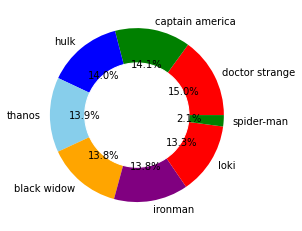

In [3]:
import matplotlib.pyplot as plt

plt.figure
my_circle=plt.Circle((0,0), 0.6, color='white')
plt.pie(value_counts, labels=["doctor strange","captain america","hulk","thanos","black widow","ironman","loki","spider-man"], colors=['red','green','blue','skyblue','orange','purple'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show() 

Para tener mejores resultados, es incrementar el número de muestras e introdudirlo a nuestro clasificador para que este pueda aprender de manera equitativa de cada una de las categorías.

In [50]:
from sklearn.utils import resample

DS_data = Marvel[Marvel["category"] == "doctor strange"]
CA_data = Marvel[Marvel["category"] == "captain america"]
TH_data = Marvel[Marvel["category"] == "thanos"]
HU_data = Marvel[Marvel["category"] == "hulk"]
BW_data = Marvel[Marvel["category"] == "black widow"]
IM_data = Marvel[Marvel["category"] == "ironman"]
LK_data = Marvel[Marvel["category"] == "loki"]
SM_data = Marvel[Marvel["category"] == "spider-man"]

DS_resampled = resample(DS_data,replace=True,n_samples=5000,random_state=122)
CA_upsampled = resample(CA_data,replace=True,n_samples=5000,random_state=123)
TH_upsampled = resample(TH_data,replace=True,n_samples=5000,random_state=124)
HU_upsampled = resample(HU_data,replace=True,n_samples=5000,random_state=125)
BW_upsampled = resample(BW_data,replace=True,n_samples=5000,random_state=126)
IM_upsampled = resample(IM_data,replace=True,n_samples=5000,random_state=127)
LK_upsampled = resample(LK_data,replace=True,n_samples=5000,random_state=128)
SM_upsampled = resample(SM_data,replace=True,n_samples=5000,random_state=129)

Marvel = pd.concat([DS_resampled,CA_upsampled,TH_upsampled,HU_upsampled,BW_data,IM_upsampled,LK_data,SM_upsampled])

X = Marvel.drop(columns = ["category", "image name", "image", "size", "width", "height"])
y = Marvel["category"]
value_counts = y.value_counts()
print(value_counts)

thanos             5000
captain america    5000
spider-man         5000
hulk               5000
doctor strange     5000
ironman            5000
black widow         375
loki                361
Name: category, dtype: int64


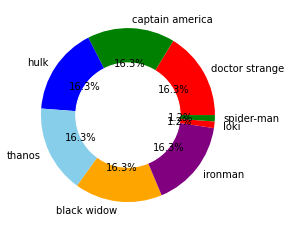

In [5]:
import matplotlib.pyplot as plt

plt.figure
my_circle=plt.Circle((0,0), 0.6, color='white')
plt.pie(value_counts, labels=["doctor strange","captain america","hulk","thanos","black widow","ironman","loki","spider-man"], colors=['red','green','blue','skyblue','orange','purple'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show() 

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = Marvel.drop(columns = ["category", "image name", "image", "size", "width", "height"])
y = Marvel["category"]

train_percentage = 70
test_sz = round(1 - (train_percentage/100), 2)

# separación de datos 70% entramiento - 30 prueba%
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = test_sz, random_state=5)
print(X_train.shape)

(21515, 2048)


#### **IV. Desarollo Experimental**
---



Debemos de crear nuestros modelos clasificadores para llevar a cabo el objetivo del proyecto. Para esto se utilizarán los clasificadores Random Forest, SVM (SVC), y red neuronal MLP.

##### **Creación de modelos**

###### **a. Random Forest (100 árboles)**

In [24]:
from sklearn.ensemble import RandomForestClassifier 

model_100_rf = RandomForestClassifier(n_estimators=100)

###### **b. Random Forest (200 árboles)**

In [25]:
from sklearn.ensemble import RandomForestClassifier 

model_200_rf = RandomForestClassifier(n_estimators=200)

###### **c. SVC (C=1, Kernel = rbf)**

In [26]:
from sklearn.svm import SVC
model_1_svc = SVC(C=1, kernel = 'rbf')

###### **d. SVC (C=1, Kernel = linear)**

In [27]:
from sklearn.svm import SVC
model_2_svc = SVC(C=1, kernel = 'linear')

###### **e. Red neuronal MLP (Nodos de entrada=8, Nodos de salida=5)**

In [7]:
from sklearn.neural_network import MLPClassifier
model_8_5_mlp = MLPClassifier(hidden_layer_sizes=(8,5), activation='relu', solver='adam', max_iter=500)

###### **f. Red neuronal MLP (Nodos de entrada=3, Nodos de salida=6)**

In [8]:
from sklearn.neural_network import MLPClassifier
model_3_6_mlp = MLPClassifier(hidden_layer_sizes=(3,6), activation='relu', solver='adam', max_iter=500)

##### **Ajuste de Modelos con Históricos**

Posteriormente, ajustaremos los datos de nuestro data set en nuestros modelos clasificadores.

###### **a. Random Forest (100 árboles)**

In [28]:
import time
start_time = time.time()
model_100_rf.fit(X_train, Y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 35.755624771118164 seconds ---


###### **b. Random Forest (200 árboles)**

In [29]:
import time
start_time = time.time()
model_200_rf.fit(X_train, Y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 68.11778616905212 seconds ---


###### **c. SVC (C=1, Kernel = rbf)**

In [30]:
import time
start_time = time.time()
model_1_svc.fit(X_train, Y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 154.06330490112305 seconds ---


###### **d. SVC (C=1, Kernel = linear)**

In [31]:
import time
start_time = time.time()
model_2_svc.fit(X_train, Y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 95.70685291290283 seconds ---


###### **e. Red neuronal MLP (Nodos de entrada=8, Nodos de salida=5)**

In [11]:
import time
start_time = time.time()
model_8_5_mlp.fit(X_train, Y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 151.29262137413025 seconds ---


###### **f. Red neuronal MLP (Nodos de entrada=3, Nodos de salida=6)**

In [12]:
import time
start_time = time.time()
model_3_6_mlp.fit(X_train, Y_train)
print("--- %s seconds ---" % (time.time() - start_time))

--- 108.22403311729431 seconds ---


##### **Predición de nuevos datos**

A continuación se realiza la predicción de datos utilizando nuestros modelos entrenados, con datos que reservamos específicamente para realizar las pruebas. También se muestran los primeros siete datos.

###### **a. Random Forest (100 árboles)**

In [35]:
import numpy as np
# prueba del modelo
y_100_rf_predict = model_100_rf.predict(X_test)
print(np.array(Y_test[:7]))
print(y_100_rf_predict[:7])

['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']
['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']


###### **b. Random Forest (200 árboles)**

In [36]:
import numpy as np
# prueba del modelo
y_200_rf_predict = model_200_rf.predict(X_test)
print(np.array(Y_test[:7]))
print(y_200_rf_predict[:7])

['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']
['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']


###### **c. SVC (C=1, Kernel = rbf)**

In [33]:
import numpy as np
# prueba del modelo
y_1_svc_predict = model_1_svc.predict(X_test)
print(np.array(Y_test[:7]))
print(y_1_svc_predict[:7])

['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']
['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']


###### **d. SVC (C=1, Kernel = linear)**

In [51]:
import numpy as np
# prueba del modelo
y_2_svc_predict = model_2_svc.predict(X_test)
print(np.array(Y_test[:7]))
print(y_2_svc_predict[:7])

['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']
['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']


###### **e. Red neuronal MLP (Nodos de entrada=8, Nodos de salida=5)**

In [13]:
import numpy as np
# prueba del modelo
y_mlp_8_5_predict = model_8_5_mlp.predict(X_test)
print(np.array(Y_test[:7]))
print(y_mlp_8_5_predict[:7])

['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']
['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']


###### **f. Red neuronal MLP (Nodos de entrada=3, Nodos de salida=6)**

In [14]:
import numpy as np
# prueba del modelo
y_mlp_3_6_predict = model_3_6_mlp.predict(X_test)
print(np.array(Y_test[:7]))
print(y_mlp_3_6_predict[:7])

['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']
['captain america' 'captain america' 'spider-man' 'captain america'
 'spider-man' 'thanos' 'spider-man']


#### **V. Resultados**
---



###### **a. Random Forest (100 árboles)**

<ul>
<li><u>Cross Value</u></li>
</ul>

In [37]:
from sklearn.model_selection import cross_val_score
rf_100_cv = cross_val_score(model_100_rf, X_train, Y_train, cv=3, scoring="accuracy")
print(rf_100_cv)

[0.96151701 0.96054099 0.96025659]


<ul>
<li><u>Precisión</u></li>
</ul>

In [38]:
from sklearn.metrics import accuracy_score
rf_100_acc = accuracy_score(Y_test, y_100_rf_predict)*100
print(("precisión RF = %.2f" % rf_100_acc)+' %')

precisión RF = 96.33 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [39]:
from sklearn.metrics import confusion_matrix
rf_100_cm = confusion_matrix(Y_test, y_100_rf_predict)
print(rf_100_cm)

[[  13   20   28   11    9    2    0   10]
 [   0 1507    0    6   12    0    0    0]
 [   0    4 1510    0    0    0    0    0]
 [   0   13    0 1458   40    0    0    6]
 [   0   22    4    5 1418    0    0    3]
 [   4   22   68   13   12    3    0   12]
 [   0    0    0    0    0    0 1509    0]
 [   0    5    0    7    0    0    0 1465]]


###### **b. Random Forest (200 árboles)**

<ul>
<li><u>Cross Value</u></li>
</ul>

In [40]:
from sklearn.model_selection import cross_val_score
rf_200_cv = cross_val_score(model_200_rf, X_train, Y_train, cv=3, scoring="accuracy")
print(rf_200_cv)

[0.9619353  0.96026213 0.96025659]


<ul>
<li><u>Precisión</u></li>
</ul>

In [41]:
from sklearn.metrics import accuracy_score
rf_200_acc = accuracy_score(Y_test, y_200_rf_predict)*100
print(("precisión RF = %.2f" % rf_200_acc)+' %')

precisión RF = 96.28 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [42]:
from sklearn.metrics import confusion_matrix
rf_200_cm = confusion_matrix(Y_test, y_200_rf_predict)
print(rf_200_cm)

[[  17   16   30   10   15    2    0    3]
 [   0 1508    0    5   12    0    0    0]
 [   0    4 1510    0    0    0    0    0]
 [   0   16    0 1455   40    0    0    6]
 [   0   22    4    5 1421    0    0    0]
 [   2   20   76   11   11    0    0   14]
 [   0    0    0    0    0    0 1509    0]
 [   0    5    0    7    7    0    0 1458]]


###### **c. SVC (C=1, Kernel = rbf)**

<ul>
<li><u>Cross Value</u></li>
</ul>

In [47]:
from sklearn.model_selection import cross_val_score
svc_1_cv = cross_val_score(model_1_svc, X_train, Y_train, cv=3, scoring="accuracy")
print(svc_1_cv)

[0.96291132 0.96500279 0.96681077]


<ul>
<li><u>Precisión</u></li>
</ul>

In [45]:
from sklearn.metrics import accuracy_score
svc_1_acc = accuracy_score(Y_test, y_1_svc_predict)*100
print(("precisión SVC = %.2f" % svc_1_acc)+' %')

precisión SVC = 97.17 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [48]:
from sklearn.metrics import confusion_matrix
svc_1_cm = confusion_matrix(Y_test, y_1_svc_predict)
print(svc_1_cm)

[[  58   10    4    6    9    2    0    4]
 [   0 1507    0    6   12    0    0    0]
 [   0    4 1510    0    0    0    0    0]
 [   0   17    0 1451   40    0    0    9]
 [   0   22    4    5 1418    0    0    3]
 [  10   17   31   16    7   42    0   11]
 [   0    0    0    0    0    0 1509    0]
 [   0    5    0    7    0    0    0 1465]]


###### **d. SVC (C=1, Kernel = linear)**

<ul>
<li><u>Cross Value</u></li>
</ul>

In [49]:
from sklearn.model_selection import cross_val_score
svc_2_cv = cross_val_score(model_2_svc, X_train, Y_train, cv=3, scoring="accuracy")
print(svc_2_cv)

[0.97239264 0.97225321 0.97001813]


<ul>
<li><u>Precisión</u></li>
</ul>

In [52]:
from sklearn.metrics import accuracy_score
svc_2_acc = accuracy_score(Y_test, y_2_svc_predict)*100
print(("precisión SVC = %.2f" % svc_2_acc)+' %')

precisión SVC = 97.43 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [53]:
from sklearn.metrics import confusion_matrix
svc_2_cm = confusion_matrix(Y_test, y_2_svc_predict)
print(svc_2_cm)

[[  67    7    1    3    6    4    0    5]
 [   0 1507    0    6   12    0    0    0]
 [   0    4 1510    0    0    0    0    0]
 [   0   13    0 1458   40    0    0    6]
 [   0   22    4    5 1421    0    0    0]
 [  20   12   19   11    8   54    1    9]
 [   0    0    0    0    0    0 1509    0]
 [   0    5    0    7    7    0    0 1458]]


###### **e. Red neuronal MLP (Nodos de entrada=8, Nodos de salida=5)**

<ul>
<li><u>Cross Value</u></li>
</ul>

In [17]:
from sklearn.model_selection import cross_val_score
mlp_8_5_cv = cross_val_score(model_8_5_mlp, X_train, Y_train, cv=3, scoring="accuracy")
mlp_8_5_cv

array([0.93432794, 0.95803123, 0.94700879])

<ul>
<li><u>Precisión</u></li>
</ul>

In [18]:
from sklearn.metrics import accuracy_score
mlp_8_5_acc = accuracy_score(Y_test, y_mlp_8_5_predict)*100
print(("precisión MLP = %.2f" % mlp_8_5_acc)+' %')

precisión MLP = 96.18 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [19]:
from sklearn.metrics import confusion_matrix
mlp_8_5_cm = confusion_matrix(Y_test, y_mlp_8_5_predict)
print(mlp_8_5_cm)

[[  41   10    4    5   16   12    0    5]
 [  11 1472    0   12   30    0    0    0]
 [   0    0 1500    0   14    0    0    0]
 [   0    8    0 1473   32    0    0    4]
 [   0   22    4   27 1399    0    0    0]
 [  13   10   22   14    5   46    0   24]
 [   0    0    0    0    0    0 1509    0]
 [   0    5    3   17   23    0    0 1429]]


###### **f. Red neuronal MLP (Nodos de entrada=3, Nodos de salida=6)**

<ul>
<li><u>Cross Value</u></li>
</ul>

In [21]:
from sklearn.model_selection import cross_val_score
mlp_3_6_cv = cross_val_score(model_3_6_mlp, X_train, Y_train, cv=3, scoring="accuracy")
mlp_3_6_cv

array([0.48452315, 0.16494702, 0.71440524])

<ul>
<li><u>Precisión</u></li>
</ul>

In [23]:
from sklearn.metrics import accuracy_score
mlp_3_6_acc = accuracy_score(Y_test, y_mlp_3_6_predict)*100
print(("precisión MLP = %.2f" % mlp_3_6_acc)+' %')

precisión MLP = 93.60 %


<ul>
<li><u>Matríz de Confusión</u></li>
</ul>

In [22]:
from sklearn.metrics import confusion_matrix
mlp_3_6_cm = confusion_matrix(Y_test, y_mlp_3_6_predict)
print(mlp_3_6_cm)

[[   0   16   16   21    8    0    3   29]
 [   0 1457    0   21    4    0    0   43]
 [   0    0 1500    0    0    0    0   14]
 [   0   11    0 1429   12    0    0   65]
 [   0   28   11  110 1274    0    0   29]
 [   1   14   25   26   20    0    1   47]
 [   0    0    0    0    0    0 1509    0]
 [   0    0    0    8    7    0    0 1462]]


---

<h5><b>Resumen de resultados</b></h5>

---

In [54]:
import pandas as pd
data = [[rf_100_acc, rf_100_cv, rf_100_cm],[rf_200_acc, rf_200_cv,rf_200_cm],[svc_1_acc, svc_1_cv,svc_1_cm],[svc_2_acc, svc_2_cv,svc_2_cm],[mlp_8_5_acc,mlp_8_5_cv,mlp_8_5_cm],[mlp_3_6_acc,mlp_3_6_cv,mlp_3_6_cm]]
pd.DataFrame(data, columns=["Precisión", "Cross-Value", "Confusion Matrix"], index= ["Random Forest (100 árboles)","Random Forest (200 árboles)","SVC (C=1, Kernel = rbf)","SVC (C=1, Kernel = linear)","Red neuronal MLP (8,5)","Red neuronal MLP (3,6)"])

Precisión  \
Random Forest (100 árboles)  96.334454   
Random Forest (200 árboles)  96.280230   
SVC (C=1, Kernel = rbf)      97.169504   
SVC (C=1, Kernel = linear)   97.429780   
Red neuronal MLP (8,5)       96.182627   
Red neuronal MLP (3,6)       93.601562   

                                                                   Cross-Value  \
Random Forest (100 árboles)  [0.9615170105967652, 0.9605409927495817, 0.960...   
Random Forest (200 árboles)  [0.9619353039598438, 0.9602621305075293, 0.960...   
SVC (C=1, Kernel = rbf)      [0.9629113218070273, 0.9650027886224205, 0.966...   
SVC (C=1, Kernel = linear)   [0.9723926380368099, 0.9722532069157837, 0.970...   
Red neuronal MLP (8,5)       [0.9343279419966537, 0.9580312325711099, 0.947...   
Red neuronal MLP (3,6)       [0.48452314556609033, 0.16494701617401003, 0.7...   

                                                              Confusion Matrix  
Random Forest (100 árboles)  [[13, 20, 28, 11, 9, 2, 0, 10], [0, 1507, 0, 6...  
Random Forest (200 árboles)  [[17, 16, 30, 10, 15, 2, 0, 3], [0, 1508, 0, 5...  
SVC (C=1, Kernel = rbf)      [[58, 10, 4, 6, 9, 2, 0, 4], [0, 1507, 0, 6, 1...  
SVC (C=1, Kernel = linear)   [[67, 7, 1, 3, 6, 4, 0, 5], [0, 1507, 0, 6, 12...  
Red neuronal MLP (8,5)       [[41, 10, 4, 5, 16, 12, 0, 5], [11, 1472, 0, 1...  
Red neuronal MLP (3,6)       [[0, 16, 16, 21, 8, 0, 3, 29], [0, 1457, 0, 21...

#### **VI. Análisis de Resultados**
---


A partir de los resultados, podemos afirmar que se obtuvieron resultados bastante precisos. A partir de la tabla descrita en el apartado de resultados, se puede observar que los clasificadores que tuvieron mayor precisión fueron los que estaban basados en support vector machines. Por lo tanto, se puede afirmar que lo más óptimo cuando se realiza clasificación, es utilizar SVM para tener mayor precisión en los resultados. De manera contraria, la red neuronal fue la que tuvo los peores resultados, esto puede ser a que se requiere de mayor nùmero de entradas para mejorar precisión; la desventaja de esto es que se requiere de mayor memoria y procesamiento. 

#### **VII. Conclusiones**
---


En conclusión, se puede afirmar que se logró llevar a cabo el objetivo de la práctica. Para lograr mayor precisión en los resultados fue necesario volver a muestrear los datos, esto pues al trabajar directamente con el dataset se obtenían resultados pesímos, después de hacer este ajuste pude darme cuenta que los resultados mejoraron de manera significativa. Esto se debe a que se le da mayor cantidad de datos para entrenamiento, lo que ocaciona que el clasificador incremente su precisión al clasificar. Considero que realizar este proyecto me ayudó a entender a fondo la importancia del preprocesamiento de datos a utilizar clasificadores. 

#### **VIII. Repositorio del proyecto**
---

<img width="30" height="30" align ="right" src="img/gitlab-282507.png">

https://gitlab.com/cv4497/aprendizajemaquinav2021/-/tree/master/Proyectos/P4_Marvel

#### **IX. Video**
---
https://gitlab.com/cv4497/aprendizajemaquinav2021/-/tree/master/Proyectos/P4_Marvel/video

#### **X. Referencias**
---


Dipanjan Sarkar, Raghav Bali, & Tushar Sharma. (2018). Practical Machine Learning with Python : A Problem-Solver’s Guide to Building Real-World Intelligent Systems. Apress. 

Martínez J. (2020). Random Forest. Obtenido de https://www.iartificial.net/random-forest-bosque-aleatorio/

IBM. (2021). El modelo de redes neuronales. IBM. Obtenido de https://www.ibm.com/docs/es/spss-modeler/SaaS?topic=networks-neural-model

